# COVERAGE THREDDS Examples

The following examples demonstrate how to access datasets via the COVERAGE THREDDS Data Server.

### THREDDS NCSS Data Subsetting and Visualization

In [2]:
# Import libraries
import metpy
import xarray as xr
from siphon.catalog import TDSCatalog
from datetime import datetime
from xarray.backends import NetCDF4DataStore

In [3]:
# Set up access via NCSS
dataset_catalog_url = ('https://coverage.ceos.org/thredds/catalog/TDS_aws.xml'
                       '?dataset=JPL-L4-MRVA-CHLA-GLOB-v3.0')
dataset_catalog = TDSCatalog(dataset_catalog_url)
dataset = dataset_catalog.datasets[0].subset()
dataset.variables # show variables

{'CHLA_analysis', 'analysis_error', 'dt_data', 'mask'}

In [4]:
# Create a new NCSS dataset query
query = dataset.query()

# Request data in netCDF format
query.accept('netcdf')

# Ask for our variable
query.variables('CHLA_analysis')

# Set the time range of data we want
start = datetime(2021, 8, 1)
end = datetime(2021, 8, 2)
query.time_range(start, end)

# Set the spatial limits
query.lonlat_box(west=-110, east=-45, north=50, south=10)

# get the data!
data = dataset.get_data(query)

data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.7, ACDD-1.3
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention
    title: Daily global Chlorophyll-A map by MRVA
    summary: A 0.25-degree resolution JPL CHL-A analysis, a merged, multi-sensor, L4 CHL-A analysis production from JPL based on the MRVA algorithm
    keywords: Oceans > Ocean Optics > Ocean Color
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    history: created at nominal 4-day latency
    processing_level: L4
    cdm_data_type: grid
    creator_name: NASA COVERAGE project
    creator_email: coverage@jpl.nasa.gov
    creator_url: http://coverage.jpl.nasa.gov
    creator_institution: Jet Propulsion Laboratory
    institution: Jet Propulsion Laboratory
    project: NASA COVERAGE
    program: NASA Physical Oceanography Program and NASA Earth Science Data Information and System (ESDIS)
   

In [20]:
# open the data in xarray
ds = xr.open_dataset(NetCDF4DataStore(data))
ds

<xarray.Dataset>
Dimensions:        (lon: 261, time: 2, lat: 161)
Coordinates:
  * lon            (lon) float32 -109.9 -109.6 -109.4 ... -45.38 -45.12 -44.88
  * time           (time) datetime64[ns] 2021-08-01 2021-08-02
  * lat            (lat) float32 10.12 10.38 10.62 10.88 ... 49.62 49.88 50.12
Data variables:
    CHLA_analysis  (time, lat, lon) float32 ...
Attributes: (12/42)
    Conventions:                CF-1.7, ACDD-1.3
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      Daily global Chlorophyll-A map by MRVA
    summary:                    A 0.25-degree resolution JPL CHL-A analysis, ...
    keywords:                   Oceans > Ocean Optics > Ocean Color
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    ...                         ...
    date_created:               20220223T072924Z
    start_time:                 20220223T120000Z
    stop_time:                  20220223T120000Z
    time_coverage_start:        20220223T000000Z
    time_coverage_end:          20220223T235959Z
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...

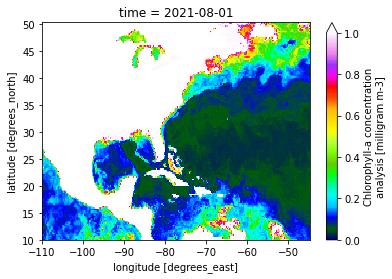

In [24]:
# Visualize the data
ds.CHLA_analysis.isel(time=0).plot(cmap='gist_ncar', vmin=0, vmax=1)

### Interactive Web Map with THREDDS WMS

In [27]:
from ipyleaflet import Map, WMSLayer, basemaps

# Make a WMS connection to a map layer
wms_layer = WMSLayer(url='https://coverage.ceos.org/thredds/wms/scan-aggregation/JPL-L4-MRVA-CHLA-GLOB-v3.0.nc',
                     layers='CHLA_analysis',
                     format='image/png',
                     time='2018-01-01T00:00:00.000Z',
                     styles='default-scalar/x-Rainbow',
                     colorscalerange='0,1',
                     transparent=True)

# Define map properties and add the WMS layer from above on top of basemap
m = Map(basemap=basemaps.NASAGIBS.BlueMarble, center=(30, -30), zoom=3)
m.add_layer(wms_layer)

# Display interactive web map
m

Map(center=[30, -30], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…